# Capstone 2: Global Video Game Sales

In [227]:
# importing modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [228]:
# loading previously cleaned dataframe

df = pd.read_csv('clean_df.csv')
df.head()

,index,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,rating,playtime,ratings_count,game_series_count,platforms
0,0,Wii Sports,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,4.19,55,174,1,Wii
1,1,Super Mario Bros.,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4.27,30,498,17,SNES||Nintendo Switch||Game Boy Advance||Game ...
2,2,Super Mario Bros.,1999.0,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07,4.27,30,498,17,SNES||Nintendo Switch||Game Boy Advance||Game ...
3,3,Mario Kart Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,4.26,12,204,10,Wii
4,4,Wii Sports Resort,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,4.17,2,89,1,Wii


# Exploratory Data Analysis

In [229]:
df.columns

Index(['index', 'Name', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'rating',
       'playtime', 'ratings_count', 'game_series_count', 'platforms'],
      dtype='object')

In [230]:
df = df.drop('index', axis=1)

In [231]:
df.shape

(9462, 14)

In [232]:
df.dtypes

Name                  object
Year_of_Release      float64
Genre                 object
Publisher             object
NA_Sales             float64
EU_Sales             float64
JP_Sales             float64
Other_Sales          float64
Global_Sales         float64
rating               float64
playtime               int64
ratings_count          int64
game_series_count      int64
platforms             object
dtype: object

# Part I Preparing the Data

Prepration of numerical columns:

Converting "Year_of_Release" to how long the game was released for since 2017 when the dataset was last updated.

In [233]:
df['Years_of_Release'] = 2017 - df['Year_of_Release']
df.drop(columns=['Year_of_Release'], axis=1, inplace=True)

In [234]:
df.head(10)

,Name,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,rating,playtime,ratings_count,game_series_count,platforms,Years_of_Release
0,Wii Sports,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,4.19,55,174,1,Wii,11.0
1,Super Mario Bros.,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4.27,30,498,17,SNES||Nintendo Switch||Game Boy Advance||Game ...,32.0
2,Super Mario Bros.,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07,4.27,30,498,17,SNES||Nintendo Switch||Game Boy Advance||Game ...,18.0
3,Mario Kart Wii,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,4.26,12,204,10,Wii,9.0
4,Wii Sports Resort,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,4.17,2,89,1,Wii,8.0
5,New Super Mario Bros.,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,4.13,25,179,19,Wii U||Nintendo DS,11.0
6,Wii Play,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,3.36,0,46,0,Wii,11.0
7,New Super Mario Bros. Wii,Platform,Nintendo,14.48,6.95,4.70,2.25,28.38,3.99,12,173,17,Wii,8.0
8,Duck Hunt,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,0.00,0,0,0,PC,33.0
9,Mario Kart DS,Racing,Nintendo,9.71,7.48,4.13,1.90,23.22,4.23,5,182,10,Nintendo DS||Wii U,12.0


Dropping sales rows with insufficient data:

In [235]:
df['Global_Sales'].value_counts().sort_index()

0.01     446
0.02     431
0.03     366
0.04     297
0.05     305
        ... 
29.81      1
32.78      1
35.57      1
40.24      1
82.54      1
Name: Global_Sales, Length: 556, dtype: int64

In [236]:
df.drop(df[df['Global_Sales'] <= 0.03].index)

,Name,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,rating,playtime,ratings_count,game_series_count,platforms,Years_of_Release
0,Wii Sports,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,4.19,55,174,1,Wii,11.0
1,Super Mario Bros.,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4.27,30,498,17,SNES||Nintendo Switch||Game Boy Advance||Game ...,32.0
2,Super Mario Bros.,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07,4.27,30,498,17,SNES||Nintendo Switch||Game Boy Advance||Game ...,18.0
3,Mario Kart Wii,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,4.26,12,204,10,Wii,9.0
4,Wii Sports Resort,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,4.17,2,89,1,Wii,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8609,Sega Arcade Gallery,Misc,THQ,0.03,0.01,0.00,0.00,0.04,0.00,0,0,0,Game Boy Advance,14.0
8610,100 Classic Games,Misc,Rondomedia,0.00,0.03,0.00,0.00,0.04,0.00,0,0,0,Nintendo DS,6.0
8611,Black Stone: Magic & Steel,Role-Playing,THQ,0.03,0.01,0.00,0.00,0.04,0.00,0,0,0,Xbox,14.0
8612,Sins of a Solar Empire: Trinity,Strategy,Kalypso Media,0.00,0.03,0.00,0.01,0.04,2.80,1,15,0,PC,7.0


In [237]:
df['rating'].value_counts()

0.00    5080
4.00     142
3.50      77
3.67      67
3.33      66
        ... 
2.63       1
2.10       1
2.51       1
2.37       1
4.49       1
Name: rating, Length: 246, dtype: int64

In [238]:
df['playtime'].value_counts()

0      6405
1       638
2       419
3       293
4       266
       ... 
129       1
43        1
226       1
90        1
91        1
Name: playtime, Length: 85, dtype: int64

More than half the values of rating and playtime are missing. Ratings count isn't related. Game series count would be an unfair form of measurement because games that were recently released could have many subsequent games that have not been released yet. These columns should be dropped.

In [239]:
df.drop(columns=['rating', 'playtime', 'ratings_count', 'game_series_count'], axis=1, inplace=True)

Coverting "platforms" column to number of platforms game is offered on.

In [240]:
plat_count = df['platforms'].str.count('\|\|') + 1
print(plat_count)

0        1
1        8
2        8
3        1
4        1
        ..
9457     3
9458    10
9459     1
9460     1
9461     1
Name: platforms, Length: 9462, dtype: int64


In [241]:
df['platforms'] = plat_count

In [242]:
df.head()

,Name,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,platforms,Years_of_Release
0,Wii Sports,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,1,11.0
1,Super Mario Bros.,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,8,32.0
2,Super Mario Bros.,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07,8,18.0
3,Mario Kart Wii,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,1,9.0
4,Wii Sports Resort,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,1,8.0


Preparation of categorical data:

In [243]:
df.dtypes

Name                 object
Genre                object
Publisher            object
NA_Sales            float64
EU_Sales            float64
JP_Sales            float64
Other_Sales         float64
Global_Sales        float64
platforms             int64
Years_of_Release    float64
dtype: object

In [244]:
df.nunique()

Name                5982
Genre                 12
Publisher            447
NA_Sales             358
EU_Sales             282
JP_Sales             193
Other_Sales          147
Global_Sales         556
platforms             18
Years_of_Release      42
dtype: int64

Checking duplicates in game name.

In [245]:
name_count = df['Name'].value_counts()
name_count.head(20)

Madden NFL 08                                  9
Madden NFL 07                                  9
FIFA 14                                        9
Ratatouille                                    9
LEGO Marvel Super Heroes                       9
LEGO Jurassic World                            8
FIFA 15                                        8
Monopoly                                       8
Angry Birds Star Wars                          8
LEGO The Hobbit                                8
LEGO Harry Potter: Years 5-7                   8
Terraria                                       8
Cars                                           8
FIFA Soccer 13                                 8
FIFA Soccer 10                                 7
LEGO Indiana Jones: The Original Adventures    7
The Sims 2                                     7
Pro Evolution Soccer 2012                      7
FIFA Soccer 08                                 7
NBA Jam                                        7
Name: Name, dtype: i

Go through each row in df, if a name appears more than once then 
- if number of times it appears is odd, take the median value 
- if number of times it appears is even, take (number of times it appears)/2 + 1

In [246]:
df[df['Name'].str.contains('LEGO Marvel Super Heroes')]

,Name,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,platforms,Years_of_Release
979,LEGO Marvel Super Heroes,Action,Warner Bros. Interactive Entertainment,1.25,0.81,0.00,0.19,2.25,10,4.0
980,LEGO Marvel Super Heroes,Action,Warner Bros. Interactive Entertainment,0.77,0.79,0.01,0.30,1.87,10,4.0
981,LEGO Marvel Super Heroes,Action,Warner Bros. Interactive Entertainment,0.59,0.76,0.01,0.26,1.62,10,4.0
982,LEGO Marvel Super Heroes,Action,Warner Bros. Interactive Entertainment,0.61,0.37,0.00,0.10,1.08,10,4.0
983,LEGO Marvel Super Heroes,Action,Warner Bros. Interactive Entertainment,0.42,0.38,0.04,0.07,0.92,10,4.0
984,LEGO Marvel Super Heroes,Action,Warner Bros. Interactive Entertainment,0.31,0.35,0.03,0.06,0.74,10,4.0
985,LEGO Marvel Super Heroes,Action,Warner Bros. Interactive Entertainment,0.11,0.29,0.00,0.12,0.52,10,4.0
986,LEGO Marvel Super Heroes,Action,Warner Bros. Interactive Entertainment,0.22,0.13,0.00,0.03,0.38,10,4.0
987,LEGO Marvel Super Heroes,Action,Warner Bros. Interactive Entertainment,0.04,0.12,0.00,0.01,0.17,10,4.0


In [247]:
df.shape

(9462, 10)

In [248]:
aggregate_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Name']].groupby('Name').agg(sum)
aggregate_sales.reset_index(inplace=True)

In [249]:
aggregate_sales

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,.hack//Infection Part 1,0.49,0.38,0.26,0.13,1.27
1,.hack//Link,0.00,0.00,0.14,0.00,0.14
2,.hack//Mutation Part 2,0.23,0.18,0.20,0.06,0.68
3,.hack//Outbreak Part 3,0.14,0.11,0.17,0.04,0.46
4,007 Racing,0.30,0.20,0.00,0.03,0.53
...,...,...,...,...,...,...
5977,htoL#NiQ: The Firefly Diary,0.00,0.00,0.01,0.00,0.01
5978,iCarly,1.09,0.01,0.00,0.08,1.17
5979,inFAMOUS 2,1.05,0.47,0.08,0.22,1.82
5980,thinkSMART,0.09,0.00,0.00,0.01,0.09


In [250]:
df.drop(columns=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], inplace=True)
df

,Name,Genre,Publisher,platforms,Years_of_Release
0,Wii Sports,Sports,Nintendo,1,11.0
1,Super Mario Bros.,Platform,Nintendo,8,32.0
2,Super Mario Bros.,Platform,Nintendo,8,18.0
3,Mario Kart Wii,Racing,Nintendo,1,9.0
4,Wii Sports Resort,Sports,Nintendo,1,8.0
...,...,...,...,...,...
9457,Caladrius Blaze,Shooter,Moss,3,3.0
9458,Super Meat Boy,Platform,Team Meat,10,1.0
9459,Nancy Drew: The Deadly Secret of Olde World Park,Adventure,Majesco Entertainment,1,10.0
9460,Fashion Designer: Style Icon,Simulation,505 Games,1,10.0


In [251]:
df = aggregate_sales.merge(df, how='left', on='Name')

In [252]:
df.drop_duplicates(inplace=True)
df['Name'].value_counts()

Pinball Hall of Fame: The Gottlieb Collection    5
Terraria                                         5
Myst                                             5
SimCity 2000                                     5
Minecraft                                        5
                                                ..
Travel Games For Dummies                         1
Cardfight!! Vanguard: Ride to Victory            1
WCW Nitro                                        1
Brain Quest: Grades 5 & 6                        1
Total War: Rome II                               1
Name: Name, Length: 5982, dtype: int64

In [253]:
agg_year = df[['Years_of_Release', 'Name']].groupby('Name').agg('mean')
agg_year

,Years_of_Release
Name,
.hack//Infection Part 1,15.0
.hack//Link,7.0
.hack//Mutation Part 2,15.0
.hack//Outbreak Part 3,15.0
007 Racing,17.0
...,...
htoL#NiQ: The Firefly Diary,3.0
iCarly,8.0
inFAMOUS 2,6.0


In [254]:
df = df.merge(agg_year, how='left', on='Name')
df

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre,Publisher,platforms,Years_of_Release_x,Years_of_Release_y
0,.hack//Infection Part 1,0.49,0.38,0.26,0.13,1.27,Role-Playing,Atari,1,15.0,15.0
1,.hack//Link,0.00,0.00,0.14,0.00,0.14,Role-Playing,Namco Bandai Games,1,7.0,7.0
2,.hack//Mutation Part 2,0.23,0.18,0.20,0.06,0.68,Role-Playing,Atari,1,15.0,15.0
3,.hack//Outbreak Part 3,0.14,0.11,0.17,0.04,0.46,Role-Playing,Atari,1,15.0,15.0
4,007 Racing,0.30,0.20,0.00,0.03,0.53,Racing,Electronic Arts,1,17.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...
6625,htoL#NiQ: The Firefly Diary,0.00,0.00,0.01,0.00,0.01,Platform,Nippon Ichi Software,2,3.0,3.0
6626,iCarly,1.09,0.01,0.00,0.08,1.17,Adventure,Activision,2,8.0,8.0
6627,inFAMOUS 2,1.05,0.47,0.08,0.22,1.82,Action,Sony Computer Entertainment,1,6.0,6.0
6628,thinkSMART,0.09,0.00,0.00,0.01,0.09,Misc,Conspiracy Entertainment,1,7.0,7.0


In [255]:
df = df.drop(columns='Years_of_Release_x')

In [256]:
df = df.rename(columns={'Years_of_Release_y':'Years_of_Release'})

In [257]:
df.drop_duplicates(inplace=True)

In [262]:
df.shape

(6239, 22)

One hot encoding for genre and merging the dataframes: 

In [259]:
genre_dummies = pd.get_dummies(df['Genre'])
genre_dummies.head()

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0


In [260]:
df = df.merge(genre_dummies, left_index=True, right_index=True)
df.head()

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre,Publisher,platforms,Years_of_Release,...,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,.hack//Infection Part 1,0.49,0.38,0.26,0.13,1.27,Role-Playing,Atari,1,15.0,...,0,0,0,0,0,1,0,0,0,0
1,.hack//Link,0.00,0.00,0.14,0.00,0.14,Role-Playing,Namco Bandai Games,1,7.0,...,0,0,0,0,0,1,0,0,0,0
2,.hack//Mutation Part 2,0.23,0.18,0.20,0.06,0.68,Role-Playing,Atari,1,15.0,...,0,0,0,0,0,1,0,0,0,0
3,.hack//Outbreak Part 3,0.14,0.11,0.17,0.04,0.46,Role-Playing,Atari,1,15.0,...,0,0,0,0,0,1,0,0,0,0
4,007 Racing,0.30,0.20,0.00,0.03,0.53,Racing,Electronic Arts,1,17.0,...,0,0,0,0,1,0,0,0,0,0


Ideas for dealing with publishers: 
- Examine publishers in top 100 games (percentage of games they published in this category)
- Sort publishers according to how many games they produced (maybe inaccurate measure?)
- one hot code according to if they appear in 0-100, 101-500, 500+ most popular games (based on global sales) 

In [264]:
pub_counts = df['Publisher'].value_counts()
pub_counts.head(50)

Electronic Arts                           423
Nintendo                                  379
Sony Computer Entertainment               347
Ubisoft                                   303
Namco Bandai Games                        268
Sega                                      261
Konami Digital Entertainment              258
THQ                                       251
Activision                                241
Atari                                     193
Capcom                                    147
Take-Two Interactive                      139
Microsoft Game Studios                    137
Tecmo Koei                                106
505 Games                                  92
Eidos Interactive                          91
Square Enix                                90
Acclaim Entertainment                      87
Midway Games                               72
Vivendi Games                              64
Rising Star Games                          57
Codemasters                       

# Part II Examining the Data

In [265]:
df.columns

Index(['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales', 'Genre', 'Publisher', 'platforms', 'Years_of_Release',
       'Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'],
      dtype='object')

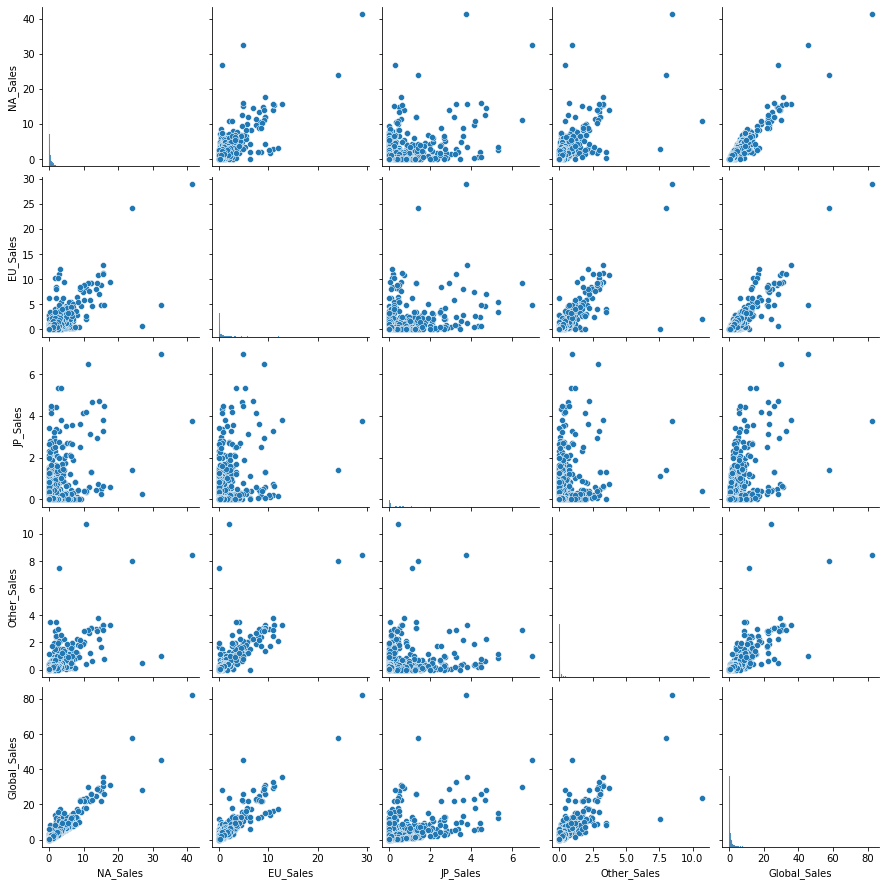

In [266]:
sns.pairplot(data=df, vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])
plt.show()

Sales between different regions have postive correlations with one another.

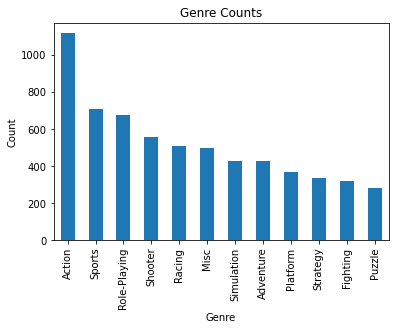

In [267]:
genre_counts = df['Genre'].value_counts()
_ = genre_counts.plot(kind='bar', xlabel='Genre', ylabel='Count', title='Genre Counts')

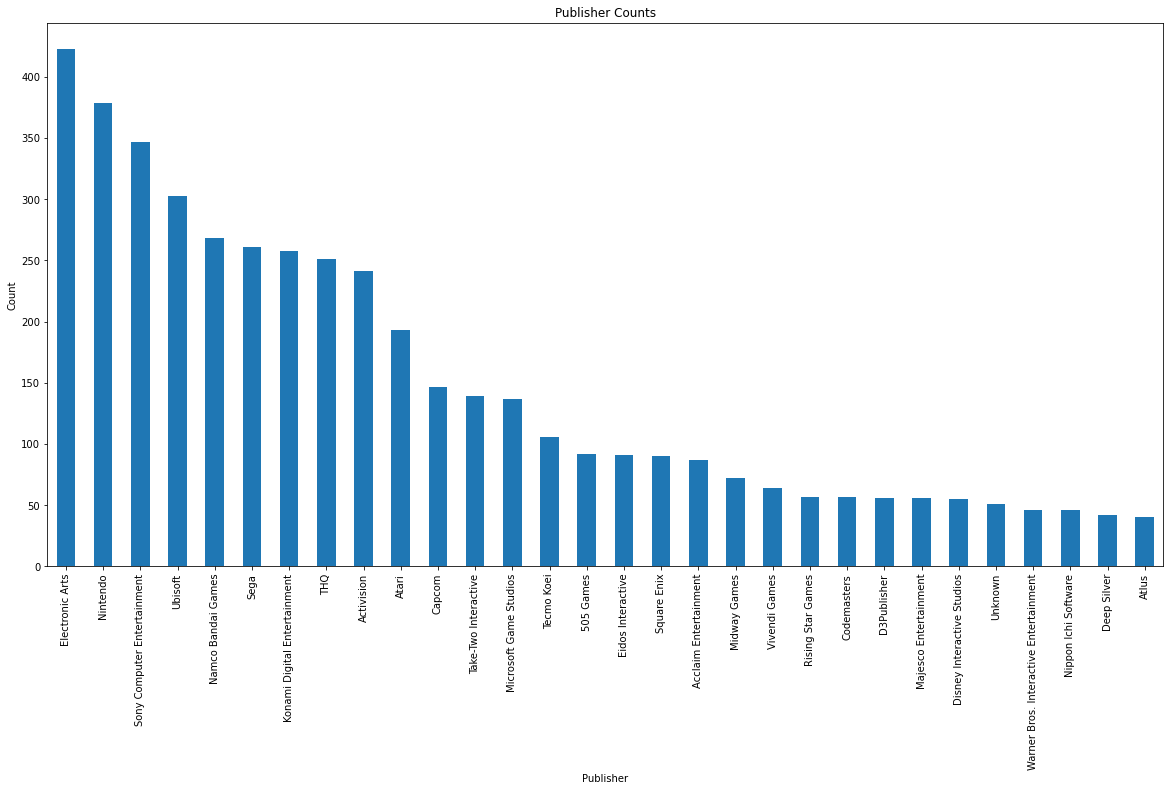

In [268]:
pub_top30 = pub_counts.head(30)
_ = pub_top30.plot(kind='bar', xlabel='Publisher', ylabel='Count', title='Publisher Counts', figsize=(20,10))

Electronic Arts is by far the top publisher of video games based on count. Runner ups are Activision, Ubisoft, THQ, and Nintendo.

In [269]:
by_NA = df.sort_values(by=['NA_Sales'], ascending=False).head(10)
by_EU = df.sort_values(by=['EU_Sales'], ascending=False).head(10)
by_JP = df.sort_values(by=['JP_Sales'], ascending=False).head(10)
by_GL = df.sort_values(by=['Global_Sales'], ascending=False).head(10)

Comparing sales in top 10 games in North America, Europe, Japan, and worldwide.

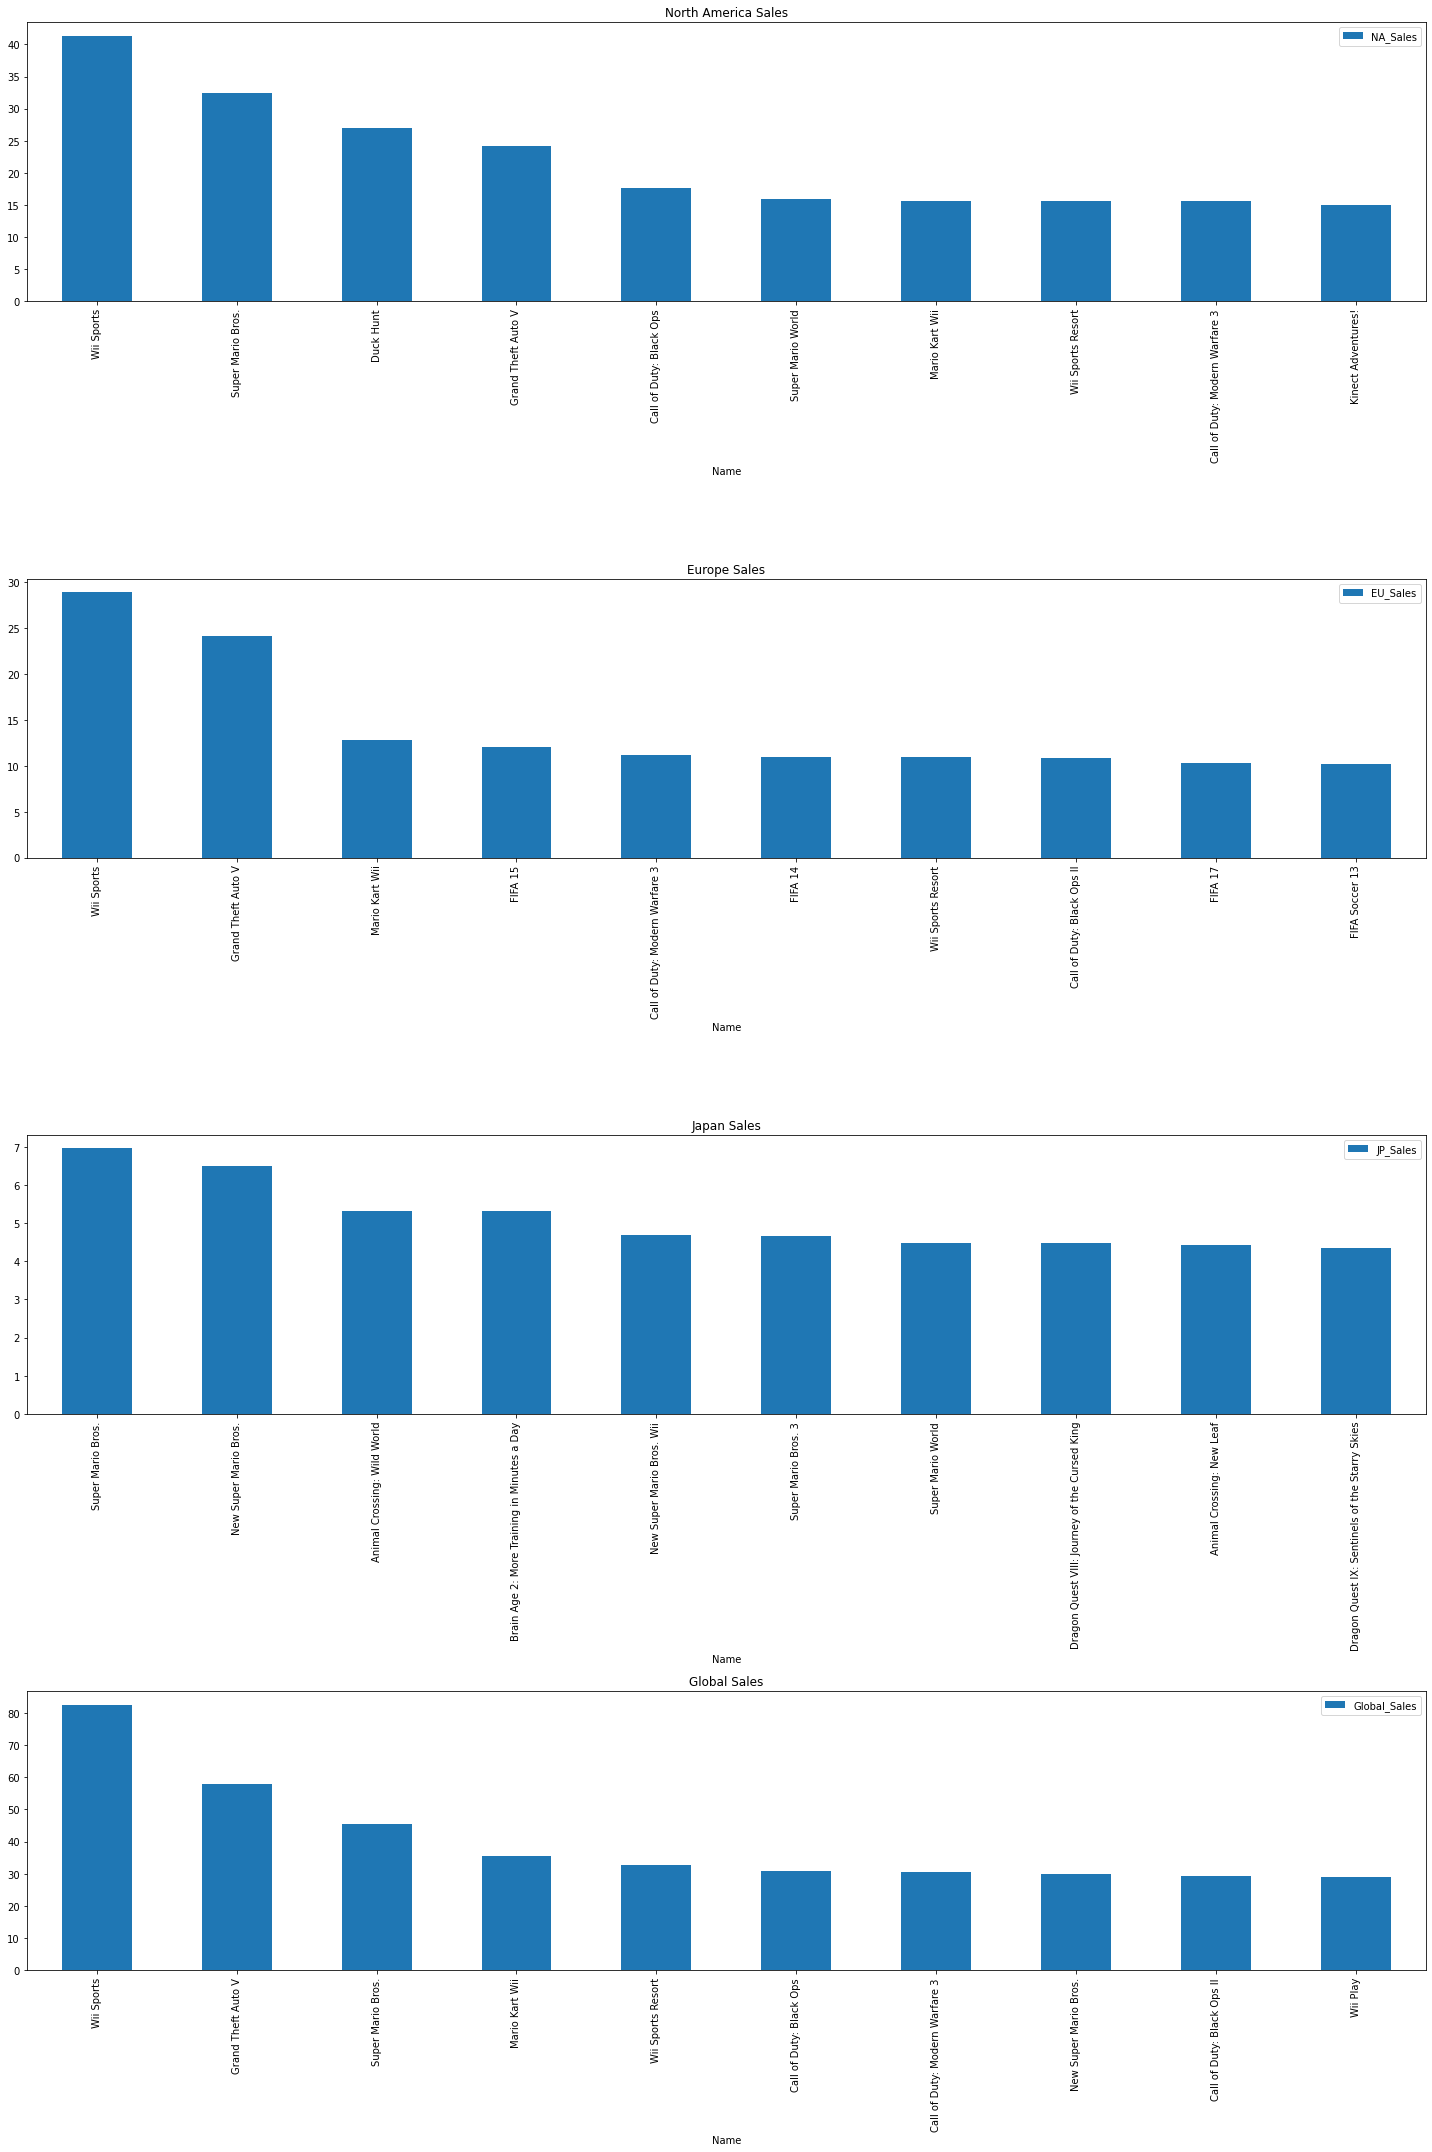

In [270]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(20,30))

by_NA.plot('Name', 'NA_Sales', kind='bar', ax=axs[0], title='North America Sales')
by_EU.plot('Name', 'EU_Sales', kind='bar', ax=axs[1], title='Europe Sales')
by_JP.plot('Name', 'JP_Sales', kind='bar', ax=axs[2], title='Japan Sales')
by_GL.plot('Name', 'Global_Sales', kind='bar', ax=axs[3], title='Global Sales')

fig.tight_layout()

In [271]:
labels = by_GL['Name']
labels

6408                        Wii Sports
2331                Grand Theft Auto V
5407                 Super Mario Bros.
3257                    Mario Kart Wii
6409                 Wii Sports Resort
793            Call of Duty: Black Ops
799     Call of Duty: Modern Warfare 3
3943             New Super Mario Bros.
794         Call of Duty: Black Ops II
6406                          Wii Play
Name: Name, dtype: object

In [272]:
top_glob10 = pd.DataFrame(labels)
top_glob10 = top_glob10.merge(df, how='left', on='Name')

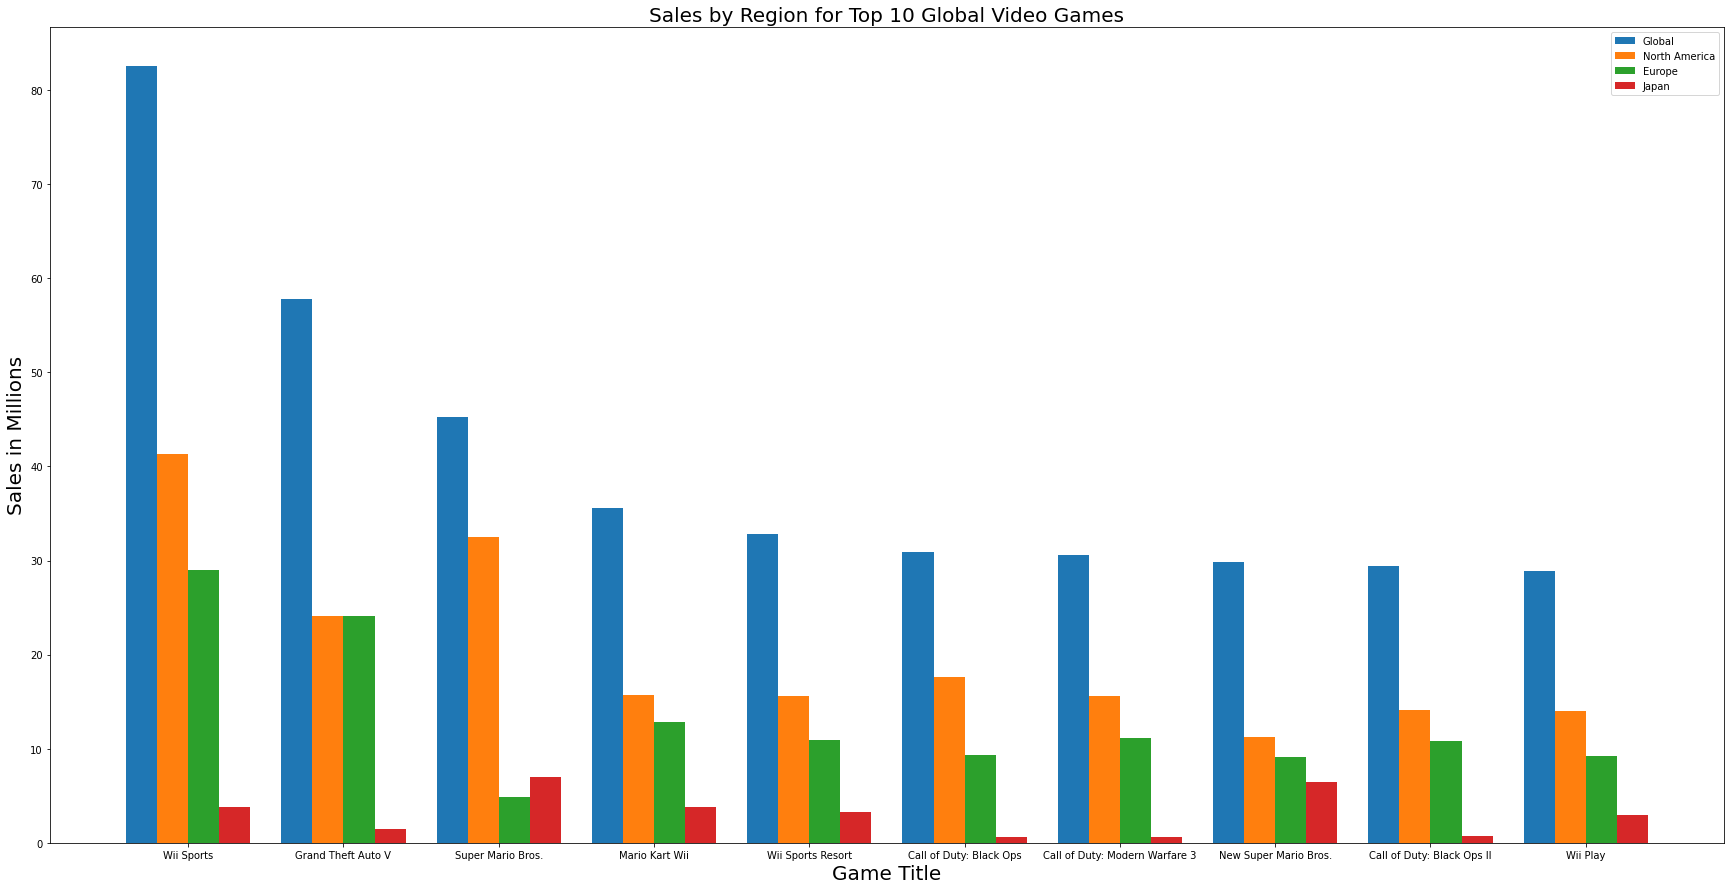

In [305]:
fig, axs = plt.subplots(figsize=(30,15))

x = np.arange(len(top_glob10['Name']))
y0 = top_glob10['Global_Sales']
y1 = top_glob10['NA_Sales']
y2 = top_glob10['EU_Sales']
y3 = top_glob10['JP_Sales']
width = 0.2


plt.bar(x - 1.5*width, y0, width, label='Global')
plt.bar(x - width/2, y1, width, label='North America')
plt.bar(x + width/2, y2, width, label='Europe')
plt.bar(x + 1.5*width, y3, width, label='Japan')

axs.set_xlabel('Game Title', fontsize=20)
axs.set_ylabel('Sales in Millions', fontsize=20)
axs.set_title('Sales by Region for Top 10 Global Video Games', fontsize=20)
axs.set_xticks(x)
axs.set_xticklabels(labels)
axs.legend()

Saving dataset for preprocessing and training 

In [306]:
df.to_csv('preprocessing.csv', index=False)